This notebook can be used to estimate the upper limit of detectable events for a trial where no instances are detected. For example, SETI (Search for Extraterrestrial Intelligence) searches that have not yet yielded a positive detection of ET. This calculation is adapted from https://seti.ucla.edu/jlm/publications/Margot23.aj.technosignatures.pdf

In [7]:
import matplotlib.pyplot as plt
import numpy as np

First, set constants to determine your probability of detection, p

$p = f_E * \eta_p$

$f_E$ is the fraction of trials that truly have an event. In a SETI search, this would be a detection of ET. The maximum value of $f_E$ is therefore your fractional upper limit, with $f_E * N$, where $N$ is your number of trials, as your upper limit.

$\eta_p$ is your ability to detect an event should one occur in your sample. In a SETI search, this would be the efficiency of your pipeline. 

Other limiting factors, such as the fraction of time a population of ET is transmitting a signal, can be added as further multipliers in $p$. 

In [20]:
#Set your constants here

eta_p = 1 #pipeline efficiency 
N = 6 * 10**7 #sample size

#D = 1 Duty cycle
#... anything else

p = eta_p * N #* D *...

Applying the Binomial Distribution with 0 successes:

$B(0, N, p) = (1-p)^N$

Next, set a confidence level, or the confidence you have that your measurement is some relevant number and not something extremely far outside of the actual distribution. It is customary to use 95% here, but this can be changed. 

Technically, this number is set first by assuming a confidence interval, but such is still not agreed on for the Binomial Distribution. 

In the case of trying to maximize an upper limit while also not finding any events, we can set our probability of 0 successes to $1-CL$, where $CL$ is our confidence level.

So, our final equation is:

$(1-p)^N = 1-CL$

Plugging in your variables for $p$ and solving for $f_E$, you might get:

$f_E = \dfrac{1 - (1-CL)^{1/N}}{\eta_p}$


In [39]:
#Set some Confidence Level

CL = 0.95

f_E = (1 - (1- CL) ** (1/N)) / eta_p

Text(0.5, 1.0, 'Upper Limit of Events')

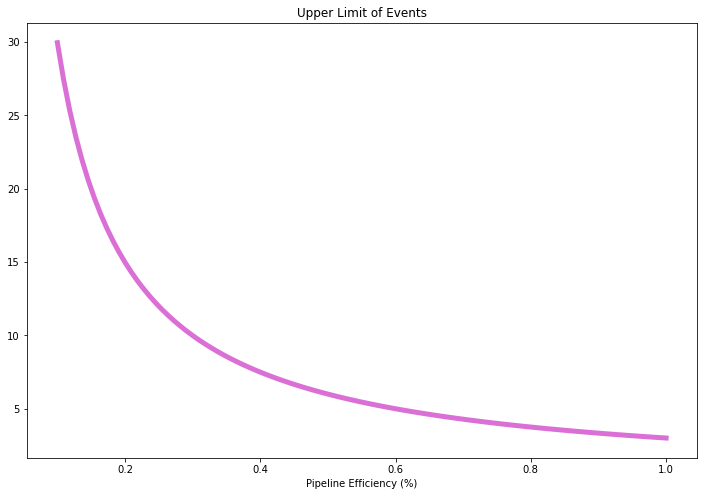

In [38]:
#Varying with something like pipeline efficiency

eta_p = np.linspace(0.1, 1, 100)
f_E = (1 - (1- CL) ** (1/N)) / eta_p

plt.figure(figsize = [12,8])
plt.plot(eta_p, f_E * N, c = 'orchid', lw = 5)
plt.xlabel('Pipeline Efficiency (%)')
plt.title('Upper Limit of Events')